# Lab 12: Gym installation and Actor Critic

Today we'll explore deep reinforcement learning with policy gradient
and actor-critic approaches.
Here are some of the references used in today's lab:

- https://gym.openai.com
- Deep Reinforcement Learning Hands-On (Packtpub)
- https://github.com/pytorch/examples/blob/main/reinforcement_learning/reinforce.py
- https://towardsdatascience.com/breaking-down-richard-suttons-policy-gradient-9768602cb63b
- https://towardsdatascience.com/learning-reinforcement-learning-reinforce-with-pytorch-5e8ad7fc7da0
- https://github.com/woithook/A2C-Pytorch-implementations

## Reinforcement learning

Reinforcement Learning (RL) is a branch of machine learning in which we set up an agent to learn in an interactive environment by trial and error using feedback on its actions and experiences. RL uses a reward (or punishment) function to signal "good" and "bad" behavior.

The RL setting has two main components:
1. Environment
2. Agent

Generally, at each step, 
1. The **agent** outputs an ***action***, which is input to the **environment**.
2. The **environment** evolves according to its dynamics, changing to a ***new state***.
3. The **agent** observes the ***new state*** of the **environment** and (optionally) obtains a ***reward***

The process continues until hopefully the agent learns what behavior maximizes its reward.

<img src="img/RL.jpg" title="Introduction" style="width: 600px;" />

Our goal is to create and design the agent to be as smart as possible. However, an agent cannot learn without an environment. So first we will install OpenAI's Gym library for creating benchmark RL agent environments.

## OpenAI Gym

Many of the popular simulation environments for RL are build on OpenAI's Gym library.

[OpenAI](https://openai.com) is a research company trying to develop systems exhibiting *artificial general intelligence* (AGI).
They developed Gym to support the development of RL algorithms. Gym ships with many reinforcement learning simulations and tasks. Visit [the Gym website](https://gym.openai.com) for a full list of environments.

<img src="img/RL_gym.PNG" title="Gym example" style="width: 600px;" />

## Install Environment in your PC

***Note***: you can use *google colab*, if your computer does not support.

***Note2***: No need to follow this instruction, if you can do it, show your result to me is fine.

**System requirement**: Ubuntu (Linux), Nvidia GPU (optional, really, but you may cry when try to run more complex agent)
    
Things to install for desktop version:
1. mujoco_py library
2. OpenAI library: gym

### Windows

We haven't tested on Windows, unfortunately, but the following links should help:
1. Install [OpenAI Gym](https://towardsdatascience.com/how-to-install-openai-gym-in-a-windows-environment-338969e24d30)
2. Install [OpenAI Gym with Box2D and Mujoco](https://medium.com/@sayanmndl21/install-openai-gym-with-box2d-and-mujoco-in-windows-10-e25ee9b5c1d5)

### Linux (your local PC)

The steps to install Gym seem to be constantly changing. The following steps currently work on Ubuntu Linux 20.04:

1. `sudo apt-get update ; sudo apt-get upgrade ; sudo apt-get install libglew-dev patchelf libosmesa6-dev libgl1-mesa-glx libglfw3 wget swig`
2. `wget https://mujoco.org/download/mujoco210-linux-x86_64.tar.gz`
3. `tar xvzf mujoco210-linux-x86_64.tar.gz`
4. `mkdir -p ~/.mujoco ; mv mujoco210 ~/.mujoco/ ; rm mujoco210-linux-x86_64.tar.gz`
5. `pip3 install gym`
6. `pip3 install mujoco`
7. Edit ~/.bashrc and add line `export LD_LIBRARY_PATH=$HOME/.mujoco/mujoco210/bin:/usr/lib/nvidia`
8. `source ~/.bashrc`
9. `python3`
       >>> import mujoco
       >>>
10. `pip3 install gym pyvirtualdisplay`
11. `pip3 install gym[atari,accept-rom-license]`
12. `pip3 install gym[Robotics,classic_control]`
13. `pip3 install gym-robotics`
14. `pip3 install box2d-py`
15. `pip3 install gym[Box_2D]`

#### Alternative (if mujoco-py doesn't work)

If the above method does not work, the `free-mujoco-py` library may work instead:
1. `pip3 uninstall mujoco-py`
2. `pip3 install free-mujoco-py`

***Test it!***: After installing Gym as above, try this code.
If there is any error, you should solve the problem or use the free Mujoco alternative above instead.
This code will take a long time to compile libraries the first time you run it but should be fast after the first try.

In [ ]:
import gym
import time

env = gym.make("FetchPickAndPlace-v1")
env.reset()
env.render()
time.sleep(5)
env.close()

### Google Colab

If you cannot setup on your own computer, you can use Google Colab to and train in this class. Unfortunately, you have to re-run the
installation steps every time your environment shuts down (12 hours for the free version and 24 hours for the Pro version).

You can access Google colab from this [colab](https://colab.research.google.com/). Sign in as your e-mail and it will ready to use.

Open a Google colab file and copy the code below:

#### Step 1: Install xvfb & other dependencies

In [ ]:
!apt-get install x11-utils > /dev/null 2>&1 
!pip install pyglet > /dev/null 2>&1 
!apt-get install -y xvfb python-opengl > /dev/null 2>&1

#### Step 2: Install mujoco
This step used for 3D simulators. Ex. Robots, and some control plants

In some simulators, it does not require.

In [ ]:
# Include this at the top of your colab code

import os

if not os.path.exists('.mujoco_setup_complete'):
    # Get the prereqs
    !apt-get -qq update
    !apt-get -qq install -y libosmesa6-dev libgl1-mesa-glx libglfw3 libgl1-mesa-dev libglew-dev patchelf
    # Get Mujoco
    !mkdir ~/.mujoco
    !wget -q https://mujoco.org/download/mujoco210-linux-x86_64.tar.gz -O mujoco.tar.gz
    !tar -zxf mujoco.tar.gz -C "$HOME/.mujoco"
    !rm mujoco.tar.gz
    # Add it to the actively loaded path and the bashrc path (these only do so much)
    !echo 'export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:$HOME/.mujoco/mujoco210/bin' >> ~/.bashrc 
    !echo 'export LD_PRELOAD=$LD_PRELOAD:/usr/lib/x86_64-linux-gnu/libGLEW.so' >> ~/.bashrc 
    # THE ANNOYING ONE, FORCE IT INTO LDCONFIG SO WE ACTUALLY GET ACCESS TO IT THIS SESSION
    !echo "/root/.mujoco/mujoco210/bin" > /etc/ld.so.conf.d/mujoco_ld_lib_path.conf
    !ldconfig
    # Install Mujoco-py
    !pip3 install -U 'mujoco-py<2.2,>=2.1'
    # run once
    !touch .mujoco_setup_complete

try:
    if _mujoco_run_once:
        pass
except NameError:
    _mujoco_run_once = False
    
if not _mujoco_run_once:
    # Add it to the actively loaded path and the bashrc path (these only do so much)
    try:
        os.environ['LD_LIBRARY_PATH']=os.environ['LD_LIBRARY_PATH'] + ':/root/.mujoco/mujoco210/bin'
    except KeyError:
        os.environ['LD_LIBRARY_PATH']='/root/.mujoco/mujoco210/bin'
    try:
        os.environ['LD_PRELOAD']=os.environ['LD_PRELOAD'] + ':/usr/lib/x86_64-linux-gnu/libGLEW.so'
    except KeyError:
        os.environ['LD_PRELOAD']='/usr/lib/x86_64-linux-gnu/libGLEW.so'
    # presetup so we don't see output on first env initialization
    import mujoco_py
    _mujoco_run_once = True

#### Step 3: Install pyvirtual display

This allows you to show the simulation in Google Colab (and Jupyter notebooks)

In [ ]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!pip install -U gym>=0.21.0
!pip install -U gym[atari,accept-rom-license]
!pip install -U gym[Robotics,classic_control]

From begin of March 2022, the installation has been changed (again!)

You need to install gym-robotics.

In [ ]:
!pip install gym-robotics

And also, there are somethings change (Ex: LunarLander), you may need to install box2D

In [ ]:
!pip3 install box2d-py
!pip3 install gym[Box_2D]

You can see the example and test in colab from the [link](https://colab.research.google.com/drive/1WonMpHUG_0MO8jedG7ePmoGOo-JVPS7r?usp=sharing)

## Test your environment

After you finish installation, use the code below to check that your installation is correct.

For a local installation, it's simple:

In [ ]:
import gym

# env = gym.make("CartPole-v0")
# env = gym.make("DoubleDunk-v0")
# env = gym.make("SpaceInvaders-v0")
# env = gym.make("Acrobot-v1") # double invert pendulum
# env = gym.make("Ant-v2")

env = gym.make("FetchPickAndPlace-v1")
env.reset()

for i in range(200):
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    screen = env.render()
    if done:
        break

env.close()

For Jupyter / Colab, we need matplotlib and ipythondisplay:

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

For Jupyter notebooks or running on a remote server, you need to create a virtual display and initializing your screen size. This example uses a 400x300 virtual display.

In [ ]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

For Jupyter, we can 
use gym's `rgb_array` rendering functionality, render to a "Screen" variable, then plot the screen variable using Matplotlib,
indirectly using Ipython display. If you have a local Python installation, you can skip the `rgb_array` and Matplotlib code.

In [ ]:
# env = gym.make("CartPole-v0")
# env = gym.make("DoubleDunk-v0")
# env = gym.make("SpaceInvaders-v0")
# env = gym.make("Acrobot-v1") # double invert pendulum
# env = gym.make("Ant-v2")
env = gym.make("FetchPickAndPlace-v1")
env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

for i in range(20):
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    screen = env.render(mode='rgb_array')

    plt.imshow(screen)
    ipythondisplay.clear_output(wait=True)
    ipythondisplay.display(plt.gcf())

    if done:
        break

ipythondisplay.clear_output(wait=True)
env.close()

### Save simulator video

The virtual display is very slow. For a long run, we should save a video and see the result later.
In versions 0.22 and lower, Gym has a `Monitor` class that can be used to record videos. In version 0.23
and above, the wrapper is called `RecordVideo`.

In [ ]:
import os
import gym
from gym.wrappers import RecordVideo

vdo_path = 'video_rl/'
if not os.path.exists(vdo_path):
    os.mkdir(vdo_path)

# env = gym.make("CartPole-v0")
# env = gym.make("DoubleDunk-v0")
# env = gym.make("SpaceInvaders-v0")
# env = gym.make("Acrobot-v1") # double invert pendulum
# env = gym.make("Ant-v2")

env = RecordVideo(gym.make('Ant-v3'), vdo_path)
env.reset()

for i in range(500):
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    screen = env.render()
    if done:
        break

env.close()

You should get a video in the `video_rl` directory.

<video controls src="img/openai_test2.mp4" />

## Policy Gradient and Actor-Critic methods

We've already looked at Q-learning and other TD methods for reinforcement learning. These methods estimate a
value function, then their policy is just to select the action maximizing the value in the current state.

As an alternative, today we'll look at a class of RL algorithms called Policy Gradient (PG) methods.
Instead of learning the value function then finding the value maximizing the value,
PG methods learn the policy directly by increasing or decreasing the probability of a particular selected action in proportion to
some measure of that action's value.

The REINFORCE algorithm is a simple PG method that obtains state-action value function measurements $Q$
alongside policy decisions and utilizes
the $Q$ value of a state action pair to decide how much to increase or decrease the probability of a particular action in that state.

Since REINFORCE has one model for the policy $\pi$ and only uses actual rewards to calculate $Q$ values,
it's not quite an Actor-Critic method. However, since it does directly
optimizes the policy function using its gradient with respect to its parameters, it's a PG method.


## REINFORCE

The policy gradient loss function in REINFORCE is 
$$\mathcal{L}=-Q(s,a)\log \pi(a|s)$$

Without $Q$, minimizing this loss would be equivalent to maximizing the probability of taking action $a$ in state $s$.
With $Q$, we're increasing the probability of action $a$ in proportion to $Q(s,a)$, the critic's estimate of how valuable
action $a$ is in state $s$. If $Q(s,a)$ is small, we'll only increase the probability of taking action $a$ slightly, and if it's
negative, we'll *decrease* the probability of taking action $a$.

The steps of REINFORCE are as follows.

1. Initialize the network with random weights
2. Play $N$ full episodes, saving their $(s, a, r, s’)$ transitions
3. For every step $t$ of every episode $k$, calculate the discounted total reward for subsequent steps $Q_{k,t}=\sum_{i=0}\gamma^i r_i$
4. Calculate the loss function for all transitions $\mathcal{L}=-\sum_{k,t}Q_{k,t}\log (\pi(s_{k,t},a_{k,t}))$
5. Perform SGD update of weights of $\pi$ to minimize $\mathcal{L}$
6. Repeat from step 2 until converged

REINFORCE is different from Q-learning in several important aspects:

1. No explicit exploration is needed. In Q-learning, we use an $\epsilon$-greedy strategy to explore the environment and prevent our agent from getting stuck with a non-optimal policy. Now, with action probabilities returned by the network, the exploration is performed automatically so long as there is a non-zero probability for every action. Since the network is initialized with random weights, in the beginning, the action will be approximately uniform, corresponding to random agent behavior.
2. No replay buffer is used. PG methods are *on-policy* meaning we don’t train on data obtained from an old version of the policy. On policy methods are usually faster than off-policy methods in terms of the number of updates required, but they usually require much more interaction with the environment than off-policy methods such as DQN.
3. No target network is needed. Here we use Q-values, but they’re obtained from our experience in the environment. In DQN, we used a target network to break correlations in Q-value approximation, but we’re not approximating it anymore. However, other PG methods do use a target network to estimate $Q$. These are called Actor-Critic methods.

## CartPole example

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import gym
import sys

import torch
from torch import nn
import torch.nn.functional as F
from torch import optim
from torch.distributions import Categorical

from IPython import display as ipythondisplay

from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

import os
from gym.wrappers import RecordVideo

vdo_path = 'video_rl/'
if not os.path.exists(vdo_path):
    os.mkdir(vdo_path)


video_rl/ existed, do nothing


In [3]:
gamma = 0.95
seed = 0
render = False
log_interval = 10

In [4]:
env = gym.make("CartPole-v1")
env.reset(seed=seed)
torch.manual_seed(seed)

### Policies vs. Action Values

The output of a DQN is going to be a vector of value estimates while the output of the policy gradient is going to be a probability distribution over actions.

For example, a policy network and a DQN network that have learned the CartPole task with two actions (left and right). If we pass a state s to each, we might get the following from the DQN:

$$\pi_{DQN}(s) = [12.3, 23.9]$$

and the policy gradient:

$$\pi_{PG}(s) = [0.28, 0.72]$$

The DQN gives us estimates of the discounted future rewards of the state and we make our selection based on these values (typically taking the maximum value according to some epsilon-greedy rule). The policy gradient, on the other hand, gives us probabilities of our actions. The way we make our selection, in this case, is by choosing action 0 28% of the time and action 1 72% of the time. These probabilities will change as the network gains more experience.

### Values to Probabilities

To get these probabilities in PG method, we use a simple function called softmax at the output layer. The function is given below:


$$\sigma(x)_i= \frac{e^{x_i}}{\sum_{j=1}^k e^{x_j}}$$

This squashes all of our values to be between 0 and 1, and ensures that all of the outputs sum to 1 ($\sum \sigma(x) = 1$). Because we’re using the exp(x) function to scale our values, the largest ones tend to dominate and get more of the probability assigned to them.

### Policy class

We’re going to set up a simple class called <code>policy</code> that will contain our neural network. It’s going to have two hidden layers with a ReLU activation function and softmax output. We’ll also give it a method called predict that enables us to do a forward pass through the network.

In [5]:
class Policy(nn.Module):
    def __init__(self, env):
        super(Policy, self).__init__()
        self.n_inputs = env.observation_space.shape[0]
        self.n_outputs = env.action_space.n
        
        self.affine1 = nn.Linear(self.n_inputs, 128)
        self.dropout = nn.Dropout(p=0.6)
        self.affine2 = nn.Linear(128, self.n_outputs)

        self.saved_log_probs = []
        self.rewards = []

    def forward(self, x):
        x = self.affine1(x)
        x = self.dropout(x)
        x = F.relu(x)
        action_scores = self.affine2(x)
        return F.softmax(action_scores, dim=1)
    
    def select_action(self, state):
        state = torch.from_numpy(state).float().unsqueeze(0)
        probs = self.forward(state)
        m = Categorical(probs)
        action = m.sample()
        self.saved_log_probs.append(m.log_prob(action))
        return action.item()

In [6]:
policy = Policy(env)
optimizer = optim.Adam(policy.parameters(), lr=1e-2)
eps = np.finfo(np.float32).eps.item()

The other thing we need is our discounting function to discount future rewards based on the discount factor $\gamma$ we use.

In [7]:
def finish_episode():
    R = 0
    policy_loss = []
    returns = []
    for r in policy.rewards[::-1]:
        R = r + gamma * R
        returns.insert(0, R)
    returns = torch.tensor(returns)
    returns = (returns - returns.mean()) / (returns.std() + eps)
    for log_prob, R in zip(policy.saved_log_probs, returns):
        policy_loss.append(-log_prob * R)
    optimizer.zero_grad()
    policy_loss = torch.cat(policy_loss).sum()
    policy_loss.backward()
    optimizer.step()
    del policy.rewards[:]
    del policy.saved_log_probs[:]

One thing I’ve done here that’s a bit non-standard is subtract the mean of the rewards at the end. This helps to stabilize the learning, particularly in cases such as this one where all the rewards are positive because the gradients change more with negative or below-average rewards than they would if the rewards weren’t normalized like this.

Now for the REINFORCE algorithm itself.

In [8]:
from itertools import count
def reinforce():
    running_reward = 10
    for i_episode in count(1):
        state, ep_reward = env.reset(), 0
        for t in range(1, 10000):  # Don't infinite loop while learning
            action = policy.select_action(state)
            state, reward, done, _ = env.step(action)
            if render:
                env.render()
            policy.rewards.append(reward)
            ep_reward += reward
            if done:
                break

        # calculate reward
        # It accepts a list of rewards for the whole episode and needs to calculate 
        # the discounted total reward for every step. To do this efficiently,
        # we calculate the reward from the end of the local reward list.
        # The last step of the episode will have the total reward equal to its local reward.
        # The step before the last will have the total reward of ep_reward + gamma * running_reward
        running_reward = 0.05 * ep_reward + (1 - 0.05) * running_reward
        finish_episode()
        if i_episode % log_interval == 0:
            print('Episode {}\tLast reward: {:.2f}\tAverage reward: {:.2f}'.format(
                  i_episode, ep_reward, running_reward))
        if running_reward > env.spec.reward_threshold:
            print("Solved! Running reward is now {} and "
                  "the last episode runs to {} time steps!".format(running_reward, t))
            break

In [9]:
reinforce()
env.close()

Episode 10	Last reward: 22.00	Average reward: 17.46
Episode 20	Last reward: 43.00	Average reward: 29.58
Episode 30	Last reward: 44.00	Average reward: 37.32
Episode 40	Last reward: 76.00	Average reward: 51.04
Episode 50	Last reward: 131.00	Average reward: 78.77
Episode 60	Last reward: 174.00	Average reward: 125.78
Episode 70	Last reward: 37.00	Average reward: 116.83
Episode 80	Last reward: 133.00	Average reward: 116.19
Episode 90	Last reward: 236.00	Average reward: 181.02
Episode 100	Last reward: 179.00	Average reward: 235.53
Episode 110	Last reward: 78.00	Average reward: 184.59
Episode 120	Last reward: 74.00	Average reward: 138.73
Episode 130	Last reward: 387.00	Average reward: 163.54
Episode 140	Last reward: 178.00	Average reward: 257.02
Episode 150	Last reward: 500.00	Average reward: 335.32
Episode 160	Last reward: 306.00	Average reward: 349.12
Episode 170	Last reward: 500.00	Average reward: 345.62
Episode 180	Last reward: 500.00	Average reward: 374.02
Episode 190	Last reward: 239.00

In [ ]:
env = RecordVideo(gym.make("CartPole-v1"), vdo_path)
is_done = False
state = env.reset()
while not is_done:
    action = policy.select_action(state)
    
    state, reward, is_done, info = env.step(action)
    # print(reward, is_done)
    screen = env.render(mode='rgb_array')
env.close()

**Note**: Despite the fact our network returns probabilities, we’re not applying softmax nonlinearity to the output. The reason behind this is that we’ll use the PyTorch log_softmax function to calculate the logarithm of the softmax output at once. This way of calculation is much more numerically stable, but we need to remember that output from the network is not probability, but raw scores (usually called logits).

### Policy-based versus value-based methods

Let’s now step back from the code we’ve just seen and talk about the differences that both the families of methods have:

- Policy methods are directly optimizing what we care about: our behavior. The value methods such as DQN are doing the same indirectly, learning the value first and providing to us policy based on this value.
- Policy methods are on-policy and require fresh samples from the environment. The value methods can benefit from old data, obtained from the old policy, human demonstration, and other sources.
- Policy methods are usually less sample-efficient, which means they require more interaction with the environment. The value methods can benefit from the large replay buffers. However, sample efficiency doesn’t mean that value methods are more computationally efficient and very often it’s the opposite. In the above example, during the training, we need to access our NN only once, to get the probabilities of actions. In DQN, we need to process two batch of states: one for the current state and another for the next state in the Bellman update.

### REINFORCE issues

1. Full episodes are required

The origin of the complete episodes requirement is to get as accurate a Q estimation as possible. When we talked about DQN, we saw that in practice, it’s fine to replace the exact value for a discounted reward with our estimation using the one-step Bellman equation $Q(s,a)=r_a+\gamma V(s')$. To estimate V(s), we’ve used our own Q-estimation, but in the case of PG, we don’t have $V(s)$ or $Q(s, a)$ anymore.

$$Q(s,a)=r_a+\gamma V(s')$$

To overcome this, two approaches exist. On the one hand, we can ask our network to estimate $V(s)$ and use this estimation to obtain $Q$.
This approach is called the **Actor-Critic method**, which is the most popular method from the PG family.

2. High gradients variance

In the PG formula $\nabla J \approx \mathbb{E}[Q(s,a)\nabla \log \pi(a|s)]$, we have a gradient proportional to the discounted reward from the given state. However, the range of this reward is heavily environment-dependent. Such a large difference can seriously affect our training dynamics, as one lucky episode will dominate in the final gradient.

In mathematical terms, our PGs have high variance and we need to do something about this in complex environments, otherwise, the training process can become unstable. The usual approach to handle this is subtracting a value called baseline from the Q. The possible choices of the baseline are as follows:

2.1. Some constant value, which normally is the mean of the discounted rewards

2.2. The moving average of the discounted rewards

2.3. Value of the state $V(s)$

3. Exploration

Even with the policy represented as probability distribution, there is a high chance that the agent will converge to some locally-optimal policy and stop exploring the environment. In DQN, we solved this using epsilon-greedy action selection: with probability epsilon, the agent took some random action instead of the action dictated by the current policy. We can use the same approach, of course, but PG allows us to follow a better path, called the entropy bonus.

4. Correlation between samples

In Deep Q-Networks, training samples in one single episode are usually heavily correlated, which is bad for SGD training. In the case of DQN, we solved this issue by having a large replay buffer with 100k-1M observations that we sampled our training batch from. This solution is not applicable to the PG family anymore, due to the fact that those methods belong to the on-policy class. The implication is simple: using old samples generated by the old policy, we’ll get PG for that old policy, not for our current one.

The obvious, but, unfortunately wrong solution would be to reduce the replay buffer size. It might work in some simple cases, but in general, we need fresh training data generated by our current policy. To solve this, parallel environments are normally used. The idea is simple: instead of communicating with one environment, we use several and use their transitions as training data.

## Policy Gradient (PG)

Before we can implement the policy gradient algorithm, we should go over specific math involved with the algorithm.

1. Define **tau** to be a trajectory or a sequence of actions and the corresponding rewards obtained by executing these actions.

$$\tau = (a_0,r_0,a_1,r_1,\cdots)$$

Then define a function of the rewards to be a discounted or undiscounted (for episodic tasks) sum of trajectory’s rewards. In practice, we will find that even for episodic tasks, it is more beneficial to use discounted sum of rewards, defined as follows:

$$R(\tau)=\sum_{t=0}^T \gamma^t r_t$$

2. Define performance measure J as an expected value of some function of the rewards that came from the most recent batch of trajectories (obtained under the current policy execution).

$$J(\pi) = \mathbb{E}_{\tau \sim \pi}[R(\tau)]$$

Let’s investigate the performance measure a little closer. By the definition of expectation, we obtain:

$$\mathbb{E}_{\tau \sim \pi}[R(\tau)] = \int_T R(\tau)P(\tau|\pi)d\tau$$

It is essential to understand that we would like to use the gradient of the performance measure to optimize our policy (agent). Hence, we obtain the following:

$$\nabla_\Theta J(\pi) = \nabla_\Theta \mathbb{E}_{\tau \sim \pi}[R(\tau)] =  \int_T R(\tau)\nabla_\Theta P(\tau|\pi)d\tau$$

Now, there is an excellent trick or the log-derivative trick that comes from the following identity:

$$\frac{\partial \log (x)}{\partial x} = \frac{1}{x} => \partial x = x\partial \log(x)$$

We can use this trick to replace the gradient of the probability of the trajectory with the product of the probability and gradient of the log-probability of the trajectory, or:

$$\int_T R(\tau)\nabla_\Theta P(\tau|\pi)d\tau = \int_T R(\tau)\nabla_\Theta \log P(\tau|\pi)d\tau$$

If we look closely at the right-hand side, we can notice that it is an expectation itself:

$$\int_T R(\tau)\nabla_\Theta \log P(\tau|\pi)d\tau = \mathbb{E}_{\tau \sim \pi}[\nabla_\Theta \log P(\tau|\pi)R(\tau)]$$

But what is the log-probability of the trajectory? It turns out that we can use the chain rule to define the probability over the trajectory:

$$P(\tau|\pi) = \rho(s_0) \prod_{t=0}^{T-1}P(s_{t+1}|s_t,a_t)\pi(a_t|s_t) $$

Note that Chain rule can be used to define the probability distribution over the trajectory space.

Intuitively this chain rule makes a lot of sense. We sample the initial state from some initial state distribution. Then, as our actions are stochastic, we choose an action with some probability over the action space, which is our policy. Finally, the transition model is stochastic too; hence, we multiply by the probability of transitioning from the previous state to the next state. We continue this process until we reach the end of the episode.

Now, let us look into the log-probability distribution over the trajectory space:

$$\log P(\tau|\pi) = \log \rho(s_0)+\sum_{t=0}^{T-1}\log P(s_{t+1}|s_t,a_t)+ \log \pi(a_t|s_t)$$

Let us calculate the gradient of the log-probability over the trajectory space with respect to the parameters of the policy:

$$\nabla_\Theta \log P(\tau|\pi) = \nabla_\Theta \log \rho(s_0) + \sum_{t=0}^{T-1} \nabla_\Theta \log P(s_{t+1}|s_t,a_t) + \nabla_\Theta \log \pi(a_t|s_t) = \nabla \log \pi(a_t|s_t)$$

We see that only the policy probability distribution depends on the policy parameters. Hence, the rest of the terms evaluate to zero. Finally, we can put all of the math together to obtain:

$$\nabla_\Theta J(\pi)= \mathbb{E}_{\tau \sim \pi}[\nabla \log \pi(a_t|s_t) R(\tau)]$$

Now, since the gradient of the performance measure is an expectation, we can estimate it with sampling, which is extremely easy. We will generate several trajectories under the current policy (as the policy gradient is an on-policy algorithm) and then will calculate the mean of the weighted (by R(tau)) log-probabilities that we obtain from the agent (policy).

### Rewards

Instead of the sum of the discounted rewards, we are going to use the sum of the discounted rewards from the time t to the end of the episode. These are called rewards-to-go and are used more frequently in policy gradient methods as the actions that are committed after time t should not have any effect on the rewards that were obtained before these actions happened.

$$R_(\tau) = \sum_{t'=t}^{T-1}\gamma^t r_t$$

### Entropy Bonus

In the code, we will also use an entropy bonus to discourage strict certainty. The idea is relatively simple: we subtract the entropy of the policy from the “loss” during the policy optimization. If the agent is overly confident in its actions, then the entropy of the policy becomes small, and the bonus vanishes. The entropy of the policy is a recurrent theme in reinforcement learning and is used in other algorithms such as Soft Actor-Critic.

### Baseline
We also are going to use a baseline. A baseline is a quantity that gets subtracted from R(tau) without affecting the expectation because, typically, the baseline is a state-specific quantity. We will use a state-specific mean of the trajectory’s rewards as a baseline.

The baseline reduces variance in the policy gradient estimation. Intuitively, it makes a lot of sense, especially in the case of the CartPole problem. Suppose that our agent can balance the pole for 2 seconds. Is that good or bad? If, on average, the agent balanced the pole for 1 second before this episode, then yes, it is much better performance. The policy gradient will be estimated to be positive in this case, and the agent will take a step in the direction of further improvement.

However, if the agent on average balanced the pole for 3 seconds before the episode, the policy gradient will be estimated to be negative, and we will still make the step in the right direction, away from the parameters that made the agent balance the pole for 2 seconds. If we don’t use the baseline, both 1 second and 3 seconds and 10 seconds episode will result in similar gradient directions; hence, training might take much longer.
It is important to note that for more complicated problems such as LunarLander, the baseline is less intuitive as we have both negative and positive rewards, and the scale of the rewards is different.

## PG on CartPole

In [11]:
import torch
import gym
from collections import namedtuple


class PolicyNet(torch.nn.Module):
    def __init__(self, input_size, output_size, hidden_layer_size=64):
        super(PolicyNet, self).__init__()
        self.fc1 = torch.nn.Linear(input_size, hidden_layer_size)
        self.fc2 = torch.nn.Linear(hidden_layer_size, output_size)
        self.softmax = torch.nn.Softmax(dim=0)

    def forward(self, x):
        x = torch.from_numpy(x).float()
        return self.softmax(self.fc2(torch.nn.functional.relu(self.fc1(x))))

    def get_action_and_logp(self, x):
        action_prob = self.forward(x)
        m = torch.distributions.Categorical(action_prob)
        action = m.sample()
        logp = m.log_prob(action)
        return action.item(), logp

    def act(self, x):
        action, _ = self.get_action_and_logp(x)
        return action


class ValueNet(torch.nn.Module):
    def __init__(self, input_size, hidden_layer_size=64):
        super(ValueNet, self).__init__()
        self.fc1 = torch.nn.Linear(input_size, hidden_layer_size)
        self.fc2 = torch.nn.Linear(hidden_layer_size, 1)

    def forward(self, x):
        x = torch.from_numpy(x).float()
        return self.fc2(torch.nn.functional.relu(self.fc1(x)))


def vpg(env, num_iter=200, num_traj=10, max_num_steps=1000, gamma=0.98,
        policy_learning_rate=0.01, value_learning_rate=0.01,
        policy_saved_path='vpg_policy.pt', value_saved_path='vpg_value.pt'):
    input_size = env.observation_space.shape[0]
    output_size = env.action_space.n
    Trajectory = namedtuple('Trajectory', 'states actions rewards dones logp')

    def collect_trajectory():
        state_list = []
        action_list = []
        reward_list = []
        dones_list = []
        logp_list = []
        state = env.reset()
        done = False
        steps = 0
        while not done and steps <= max_num_steps:
            action, logp = policy.get_action_and_logp(state)
            newstate, reward, done, _ = env.step(action)
            #reward = reward + float(state[0])
            state_list.append(state)
            action_list.append(action)
            reward_list.append(reward)
            dones_list.append(done)
            logp_list.append(logp)
            steps += 1
            state = newstate

        traj = Trajectory(states=state_list, actions=action_list,
                          rewards=reward_list, logp=logp_list, dones=dones_list)
        return traj

    def calc_returns(rewards):
        dis_rewards = [gamma**i * r for i, r in enumerate(rewards)]
        return [sum(dis_rewards[i:]) for i in range(len(dis_rewards))]

    policy = PolicyNet(input_size, output_size)
    value = ValueNet(input_size)
    policy_optimizer = torch.optim.Adam(
        policy.parameters(), lr=policy_learning_rate)
    value_optimizer = torch.optim.Adam(
        value.parameters(), lr=value_learning_rate)

    mean_return_list = []
    for it in range(num_iter):
        traj_list = [collect_trajectory() for _ in range(num_traj)]
        returns = [calc_returns(traj.rewards) for traj in traj_list]

        policy_loss_terms = [-1. * traj.logp[j] * (returns[i][j] - value(traj.states[j]))
                             for i, traj in enumerate(traj_list) for j in range(len(traj.actions))]

        policy_loss = 1. / num_traj * torch.cat(policy_loss_terms).sum()
        policy_optimizer.zero_grad()
        policy_loss.backward()
        policy_optimizer.step()

        value_loss_terms = [1. / len(traj.actions) * (value(traj.states[j]) - returns[i][j])**2.
                            for i, traj in enumerate(traj_list) for j in range(len(traj.actions))]
        value_loss = 1. / num_traj * torch.cat(value_loss_terms).sum()
        value_optimizer.zero_grad()
        value_loss.backward()
        value_optimizer.step()

        mean_return = 1. / num_traj * \
            sum([traj_returns[0] for traj_returns in returns])
        mean_return_list.append(mean_return)
        if it % 10 == 0:
            print('Iteration {}: Mean Return = {}'.format(it, mean_return))
            torch.save(policy.state_dict(), policy_saved_path)
            torch.save(value.state_dict(), value_saved_path)
    return policy, mean_return_list

video_rl2/ existed, do nothing
Iteration 0: Mean Return = 27.8
Iteration 10: Mean Return = 42.2
Iteration 20: Mean Return = 73.4
Iteration 30: Mean Return = 87.60000000000001
Iteration 40: Mean Return = 162.4
Iteration 50: Mean Return = 142.8
Iteration 60: Mean Return = 119.0
Iteration 70: Mean Return = 179.4
Iteration 80: Mean Return = 200.0
Iteration 90: Mean Return = 200.0
Iteration 100: Mean Return = 180.4
Iteration 110: Mean Return = 189.60000000000002
Iteration 120: Mean Return = 200.0
Iteration 130: Mean Return = 200.0
Iteration 140: Mean Return = 200.0
Iteration 150: Mean Return = 200.0
Iteration 160: Mean Return = 200.0
Iteration 170: Mean Return = 200.0
Iteration 180: Mean Return = 200.0
Iteration 190: Mean Return = 200.0


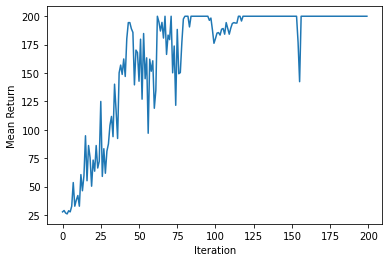

In [13]:
import gym
import matplotlib.pyplot as plt

vdo_path = 'video_rl2/'
if not os.path.exists(vdo_path):
    print("No folder ", vdo_path, 'exist. Create the folder')
    os.mkdir(vdo_path)
    print("Create directory finished")
else:
    print(vdo_path, 'existed, do nothing')

env = gym.make('CartPole-v1')

agent, mean_return_list = vpg(env, num_iter=200, max_num_steps=500, gamma=1.0,
                              num_traj=5)

env = RecordVideo(gym.make("CartPole-v1"), vdo_path, force=True)

plt.plot(mean_return_list)
plt.xlabel('Iteration')
plt.ylabel('Mean Return')
plt.savefig('vpg_returns.png', format='png', dpi=300)

state = env.reset()
for t in range(1000):
    action = agent.act(state)
    env.render()
    state, reward, done, _ = env.step(action)
    if done:
        break
env.close()

# Actor-Critic

The next step in reducing the variance is making our baseline state-dependent (which, intuitively, is a good idea, as different states could have very different baselines). Indeed, to decide about the suitability of a particular action in some state, we're using the discounted total reward of the action. However, the total reward itself could be represented as a value of the state plus advantage of the action: $Q(s, a) = V(s) + A(s, a)$.

So, why can't we use $V(s)$ as a baseline? In that case, the scale of our gradient will be just advantage $A(s, a)$, showing how this taken action is better in respect to the average state's value. In fact, we can do this, and it is a very good idea for improving the PG method. The only problem here is: we don't know the value of the $V(s)$ state to subtract it from the discounted total reward $Q(s, a)$. To solve this, let's use another neural network, which will approximate V(s) for every observation. To train it, we can exploit the same training procedure we used in DQN methods: we'll carry out the Bellman step and then minimize the mean square error to improve $V(s)$ approximation.

When we know the value for any state (or, at least, have some approximation of it), we can use it to calculate the PG and update our policy network to increase probabilities for actions with good advantage values and decrease the chance of actions with bad advantage. The policy network (which returns probability distribution of actions) is called the actor, as it tells us what to do. Another network is called critic, as it allows us to understand how good our actions were. Below is an illustration of the architecture.

<img src="img/ActorCritic2.png" title="The A2C architecture" style="width: 400px;" />

In practice, policy and value networks partially overlap, mostly due to the efficiency and convergence considerations. In this case, policy and value are implemented as different heads of the network, taking the output from the common body and transforming it into the probability distribution and a single number representing the value of the state. This helps both networks to share low-level features (such as convolution filters in the Atari agent), but combine them in a different way. This architecture is shown below.

<img src="img/ActorCritic3.png" title="A2C architecture with a shared network body" style="width: 400px;" />

### Actor-Critic steps

From a training point of view, we complete these steps:

1. Initialize network parameters $\theta$ with random values
2. Play N steps in the environment using the current policy $\pi_\theta$, saving state $s_t$, action $a_t$, reward $r_t$
3. R = 0 if the end of the episode is reached or 
4. For $i=t-1,\cdots,t_{start}$ (note that steps are processed backwards):
    - $R\leftarrow r_i + \gamma R$
    - Accumulate the PG $\partial \theta_\pi \leftarrow \partial \theta_\pi + \nabla_\theta \log \pi_\theta(a_i|s_i)(R-V\theta(s_i))$
    - Accxumulate the value gradients $\partial \theta_v \leftarrow \partial_v + \frac{\partial(R-V_\theta (s_i))^2}{\partial \theta_v}$
5. Update network parameters using the accumulated gradients, moving in the direction of PG $\theta_\pi$ and in the opposite direction of the value gradients $\partial \theta_v$
6. Repeat from step 2 until convergence is reached

The preceding algorithm is an outline, similar to those which are usually printed in research papers. In practice, some considerations need to be taken:

 - Entropy bonus is usually added to improve exploration. It's typically written as an entropy value added to the loss function:$\mathcal{L}_H = \beta \sum_i \pi_\theta (s_i) \log \pi_\theta(s_i)$. This function has a minimum when probability distribution is uniform, so by adding it to the loss function, we're pushing our agent away from being too certain about its actions.
 - Gradients accumulation is usually implemented as a loss function combining all three components: policy loss, value loss, and entropy loss. You should be careful with signs of these losses, as PGs? are showing you the direction of policy improvement, but both value and entropy losses should be minimized.
 - To improve stability, it's worth using several environments, providing you with observations concurrently (when we have multiple environments and our training batch will be created from their observations). We'll look at several ways of doing this in the next chapter.
 
The preceding method is called Actor-Critic, or sometimes Advantage Actor-Critic, which is abbreviated as A2C for short. The version with several environments running in parallel is called Advantage Asynchronous Actor-Critic, which is also known as A3C.

## Basic CartPole A2C

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import math
import random
import os
import gym

In [15]:
# Hyper Parameters
STATE_DIM = 4
ACTION_DIM = 2
STEP = 2000
SAMPLE_NUMS = 30

In [16]:
class ActorNetwork(nn.Module):

    def __init__(self,input_size,hidden_size,action_size):
        super(ActorNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size,hidden_size)
        self.fc2 = nn.Linear(hidden_size,hidden_size)
        self.fc3 = nn.Linear(hidden_size,action_size)

    def forward(self,x):
        out = F.relu(self.fc1(x))
        out = F.relu(self.fc2(out))
        out = F.log_softmax(self.fc3(out))
        return out

In [17]:
class ValueNetwork(nn.Module):

    def __init__(self,input_size,hidden_size,output_size):
        super(ValueNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size,hidden_size)
        self.fc2 = nn.Linear(hidden_size,hidden_size)
        self.fc3 = nn.Linear(hidden_size,output_size)

    def forward(self,x):
        out = F.relu(self.fc1(x))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return out

In [18]:
def roll_out(actor_network,task,sample_nums,value_network,init_state):
    #task.reset()
    states = []
    actions = []
    rewards = []
    is_done = False
    final_r = 0
    state = init_state

    for j in range(sample_nums):
        states.append(state)
        log_softmax_action = actor_network(torch.Tensor([state]))
        softmax_action = torch.exp(log_softmax_action)
        action = np.random.choice(ACTION_DIM,p=softmax_action.cpu().data.numpy()[0])
        one_hot_action = [int(k == action) for k in range(ACTION_DIM)]
        next_state,reward,done,_ = task.step(action)
        #fix_reward = -10 if done else 1
        actions.append(one_hot_action)
        rewards.append(reward)
        final_state = next_state
        state = next_state
        if done:
            is_done = True
            state = task.reset()
            break
    if not is_done:
        final_r = value_network(torch.Tensor([final_state])).cpu().data.numpy()

    return states,actions,rewards,final_r,state

In [19]:
def discount_reward(r, gamma,final_r):
    discounted_r = np.zeros_like(r)
    running_add = final_r
    for t in reversed(range(0, len(r))):
        running_add = running_add * gamma + r[t]
        discounted_r[t] = running_add
    return discounted_r

In [22]:
def A2C():
    # init a task generator for data fetching
    task = gym.make("CartPole-v1")
    init_state = task.reset()

    # init value network
    value_network = ValueNetwork(input_size = STATE_DIM,hidden_size = 40,output_size = 1)
    value_network_optim = torch.optim.Adam(value_network.parameters(),lr=0.01)

    # init actor network
    actor_network = ActorNetwork(STATE_DIM,40,ACTION_DIM)
    actor_network_optim = torch.optim.Adam(actor_network.parameters(),lr = 0.01)

    steps =[]
    task_episodes =[]
    test_results =[]

    for step in range(STEP):
        states,actions,rewards,final_r,current_state = roll_out(actor_network,task,SAMPLE_NUMS,value_network,init_state)
        init_state = current_state
        actions_var = torch.Tensor(actions).view(-1,ACTION_DIM)
        states_var = torch.Tensor(states).view(-1,STATE_DIM)

        # train actor network
        actor_network_optim.zero_grad()
        log_softmax_actions = actor_network(states_var)
        vs = value_network(states_var).detach()
        # calculate qs
        qs = torch.Tensor(discount_reward(rewards,0.99,final_r))

        advantages = qs - vs
        actor_network_loss = - torch.mean(torch.sum(log_softmax_actions*actions_var,1)* advantages)
        actor_network_loss.backward()
        torch.nn.utils.clip_grad_norm(actor_network.parameters(),0.5)
        actor_network_optim.step()

        # train value network
        value_network_optim.zero_grad()
        target_values = qs.unsqueeze(1)
        values = value_network(states_var)
        criterion = nn.MSELoss()
        value_network_loss = criterion(values,target_values)
        value_network_loss.backward()
        torch.nn.utils.clip_grad_norm(value_network.parameters(),0.5)
        value_network_optim.step()

        # Testing
        if (step + 1) % 50== 0:
                result = 0
                test_task = gym.make("CartPole-v1")
                for test_epi in range(10):
                    state = test_task.reset()
                    for test_step in range(200):
                        softmax_action = torch.exp(actor_network(torch.Tensor([state])))
                        #print(softmax_action.data)
                        action = np.argmax(softmax_action.data.numpy()[0])
                        next_state,reward,done,_ = test_task.step(action)
                        result += reward
                        state = next_state
                        if done:
                            break
                print("step:",step+1,"test result:",result/10.0)
                steps.append(step+1)
                test_results.append(result/10)
                
    return actor_network

In [ ]:
actor_network = A2C()

In [ ]:
vdo_path = 'video_rl3/'
if not os.path.exists(vdo_path):
    os.mkdir(vdo_path)

env = RecordVideo(gym.make("CartPole-v1"), vdo_path)

state = env.reset()
for t in range(1000):
    softmax_action = torch.exp(actor_network(torch.Tensor([state])))
    #print(softmax_action.data)
    action = np.argmax(softmax_action.data.numpy()[0])
    env.render()
    state, reward, done, _ = env.step(action)
    if done:
        break
env.close()

### Take-home exercise

Implement REINFORCE and A2C for one of the Atari games such as Space Invaders using a CNN for the policy
network and (for A2C) the value network.
